In [1]:
import random
import numpy as np
from keras.utils import np_utils, to_categorical
from keras.preprocessing import image
from os import listdir
from os.path import isdir, join


def load_data(container_path='datasets', folders=['A', 'B', 'C'],
              size=2000, test_split=0.2, seed=0):
    """
    Loads sign language dataset.
    """
    
    filenames, labels = [], []

    for label, folder in enumerate(folders):
        folder_path = join(container_path, folder)
        images = [join(folder_path, d)
                     for d in sorted(listdir(folder_path))]
        labels.extend(len(images) * [label])
        filenames.extend(images)
    
    random.seed(seed)
    data = list(zip(filenames, labels))
    random.shuffle(data)
    data = data[:size]
    filenames, labels = zip(*data)

    
    # Get the images
    x = paths_to_tensor(filenames).astype('float32')/255
    # Store the one-hot targets
    y = np.array(labels)

    x_train = np.array(x[:int(len(x) * (1 - test_split))])
    y_train = np.array(y[:int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)):])
    y_test = np.array(y[int(len(x) * (1 - test_split)):])

    return (x_train, y_train), (x_test, y_test)


def path_to_tensor(img_path, size):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(size, size))
    # convert PIL.Image.Image type to 3D tensor
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor 
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, size=50):
    list_of_tensors = [path_to_tensor(img_path, size) for img_path in img_paths]
    return np.vstack(list_of_tensors)


"""
    num_types = len(data['target_names'])
    targets = np_utils.to_categorical(np.array(data['target']), num_types)
"""

Using TensorFlow backend.


"\n    num_types = len(data['target_names'])\n    targets = np_utils.to_categorical(np.array(data['target']), num_types)\n"

In [2]:
(x_train,y_train), (x_test,y_test) = load_data()

In [3]:
'''''
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 5, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(x_train) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, 5 * 5): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( x_train[index,1:] )
    label_index = int(x_train[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)
'''''

"''\nimport matplotlib.pyplot as plt\nfig, axes = plt.subplots(5, 5, figsize = (10,10))\naxes = axes.ravel() # flaten the 15 x 15 matrix into 225 array\nn_train = len(x_train) # get the length of the train dataset\n# Select a random number from 0 to n_train\nfor i in np.arange(0, 5 * 5): # create evenly spaces variables \n    # Select a random number\n    index = np.random.randint(0, n_train)\n    # read and display an image with the selected index    \n    axes[i].imshow( x_train[index,1:] )\n    label_index = int(x_train[index,0])\n    axes[i].set_title(class_names[label_index], fontsize = 8)\n    axes[i].axis('off')\nplt.subplots_adjust(hspace=0.4)\n"

In [4]:
'''''
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize = (25,20))

for i, (k,v) in enumerate(x_train.items()):
    img = cv2.imread(v[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (64,64))
    plt.subplot(4,6,i+1)
    plt.imshow(img)
    plt.title(k + ":" + os.path.basename(v[0]))
    
plt.show()
'''''

'\'\'\nimport cv2\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,20))\n\nfor i, (k,v) in enumerate(x_train.items()):\n    img = cv2.imread(v[0])\n    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n    img = cv2.resize(img, (64,64))\n    plt.subplot(4,6,i+1)\n    plt.imshow(img)\n    plt.title(k + ":" + os.path.basename(v[0]))\n    \nplt.show()\n'

In [5]:
#TASK_@2

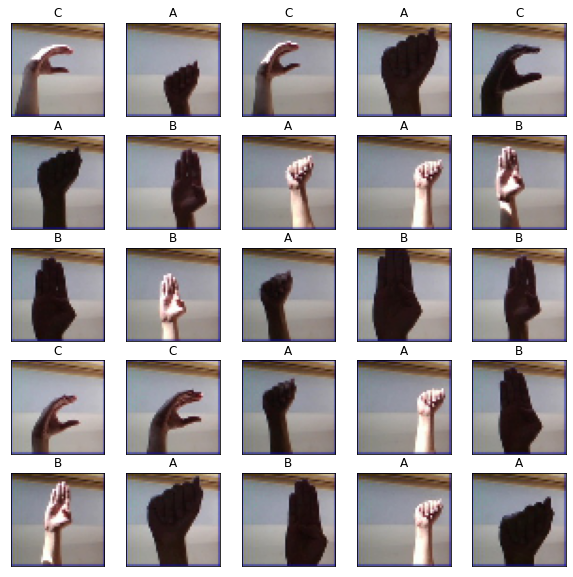

In [6]:
import matplotlib.pyplot as plt
class_names = ['A', 'B', 'C']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [7]:
print(x_train.shape)

(1600, 50, 50, 3)


In [8]:
print(y_train.shape)

(1600,)


In [9]:
'''''
#int num_B_train , num_C_train , num_C_test , num_B_test
for i in range(len(y_train)):
    if y_train[i]==1:
        num_B_train+=1
    elif y_train[i]==2:
        num_C_train+=1
        
for j in range(len(y_test)):
    if y_test[j]==1:
        num_B_test+=1
    elif y_test[j]==2:
        num_C_test+=1
        
print(num_B_train)
print(num_C_train)
print(num_B_test)
print(num_C_test)
'''''

"''\n#int num_B_train , num_C_train , num_C_test , num_B_test\nfor i in range(len(y_train)):\n    if y_train[i]==1:\n        num_B_train+=1\n    elif y_train[i]==2:\n        num_C_train+=1\n        \nfor j in range(len(y_test)):\n    if y_test[j]==1:\n        num_B_test+=1\n    elif y_test[j]==2:\n        num_C_test+=1\n        \nprint(num_B_train)\nprint(num_C_train)\nprint(num_B_test)\nprint(num_C_test)\n"

In [10]:
num_B_train = np.count_nonzero(y_train == 1)
print(num_B_train)
num_C_train = np.count_nonzero(y_train == 2)
print(num_C_train)
num_B_test = np.count_nonzero(y_test == 1)
print(num_B_test)
num_C_test = np.count_nonzero(y_test == 2)
print(num_C_test)

528
532
144
138


In [11]:
from keras.utils import to_categorical
y_train_OH = to_categorical(y_train)
print(y_train)
print(y_train_OH)
y_test_OH = to_categorical(y_test)
print(y_test)
print(y_test_OH)

[2 0 2 ... 0 2 2]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[1 2 1 2 1 0 2 0 1 1 2 0 1 2 2 0 1 0 0 1 1 0 1 1 1 2 1 1 0 2 2 2 1 2 1 0 0
 2 2 2 1 1 0 0 1 2 0 0 2 2 1 2 0 1 0 0 2 2 1 1 1 2 1 0 1 0 1 2 2 0 0 2 2 1
 1 0 1 1 0 2 1 1 2 2 2 0 2 0 0 2 2 0 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 0 1 0 0
 0 1 2 2 0 0 2 1 1 2 1 2 0 2 2 2 1 0 2 0 1 0 0 1 2 1 0 0 2 1 1 0 1 0 1 2 0
 2 2 0 1 2 1 1 1 2 2 0 2 2 2 0 1 1 1 0 0 2 2 2 1 2 1 1 1 0 1 2 2 0 2 0 2 0
 1 0 2 1 1 2 1 1 2 2 0 2 2 1 2 1 0 2 1 2 0 2 0 0 0 2 0 1 0 0 1 2 2 2 2 1 0
 2 2 2 1 1 0 1 0 1 1 0 2 1 0 2 0 0 2 0 0 0 1 1 1 2 2 1 0 2 1 1 2 0 0 0 2 0
 1 2 2 0 2 0 1 1 0 2 1 2 0 1 0 2 1 1 1 1 2 1 1 2 0 2 0 1 0 2 1 0 2 2 0 2 1
 2 1 2 1 1 0 1 1 1 2 0 1 0 2 2 2 1 1 1 1 1 0 1 0 2 1 0 0 2 1 0 2 0 1 2 0 2
 1 1 2 2 0 2 2 0 2 1 2 0 2 2 0 2 2 0 1 1 1 0 2 2 1 1 1 2 2 2 1 1 0 1 1 2 0
 0 1 0 1 1 1 2 1 1 1 2 2 2 0 1 0 2 1 1 1 0 0 2 0 2 1 1 0 2 2]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


Add a max pooling layer (pooling over windows of size 4x4).

Add another convolutional layer (15 filters, kernel size of 5, same padding, relu activation).

Add another max pooling layer (pooling over windows of size 4x4).

In [12]:
# import keras
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# from keras.optimizers import Adam
# from keras.callbacks import TensorBoard

# #Defining the Convolutional Neural Network
# cnn_model = Sequential()

# cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
# cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
# cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
# cnn_model.add(Dropout(0.25))

# cnn_model.add(Flatten())

# cnn_model.add(Dense(units = 512, activation = 'relu'))
# cnn_model.add(Dropout(0.25))
# cnn_model.add(Dense(units = 25, activation = 'softmax'))

In [13]:
# import keras
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten
# model = Sequential()
# model.add(MaxPooling2D(pool_size = (4,4)))
# model.add(Conv2D(15, (5,5), input_shape = (50,50,3), activation='relu'))
# model.add(MaxPooling2D(pool_size = (4,4)))

In [14]:
# from keras import optimizers
# model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [15]:
# print(model.summary())

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train_OH,y_validate = train_test_split(x_train,y_train_OH,test_size=0.2)
print(x_train.shape)
print(x_validate.shape)

(1280, 50, 50, 3)
(320, 50, 50, 3)


In [20]:
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Flatten
def myModel():
    model = Sequential()
    input_shape = x_train.shape
    model.build(input_shape)
    model.add(MaxPooling2D(pool_size = (4,4)))
    #model.add(Flatten())
    model.add(Conv2D(15, (5,5),padding='SAME', input_shape = (50,50,3), activation='relu'))
    model.add(MaxPooling2D(pool_size = (4,4)))
    
    model.compile(loss='categorical_crossentropy',optimizer = keras.optimizers.RMSprop(lr = 0.001),metrics=['accuracy'])
    return model

In [21]:
model = myModel()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_4 (MaxPooling2 (1280, 12, 12, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (1280, 12, 12, 15)        1140      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (1280, 3, 3, 15)          0         
Total params: 1,140
Trainable params: 1,140
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
#history = model.fit(x_train, y_train_OH, batch_size = 32, epochs = 2, validation_data = (x_validate, y_validate))

In [26]:
history = model.fit(x_train, y_train_OH,
                    epochs = 2,
                    batch_size = 32,
                    validation_data = (x_validate, y_validate))

ValueError: Error when checking target: expected max_pooling2d_5 to have 4 dimensions, but got array with shape (1280, 3)

In [29]:
for layer in model.layers:
    print(layer.output_shape)

(1280, 12, 12, 3)
(1280, 12, 12, 15)
(1280, 3, 3, 15)


In [ ]:
eval_loss, eval_acc = model.evaluate(x_test, y_test_OH)
print('Evaluation Loss: {:.4f}, Evaluation Accuracy: {:.2f}'.format(eval_loss, eval_acc * 100))
